## The third In-class-exercise (2/22/2022, 40 points in total)

The purpose of this exercise is to understand text representation.

Question 1 (10 points): Describe an interesting text classification or text mining task and explain what kind of features might be useful for you to build the machine learning model. List your features and explain why these features might be helpful. You need to list at least five different types of features.

In [1]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

One of the most popular text classification applications is sentiment analysis, a type of classifier used for 
understanding if a given text is talking positively or negatively about a given subject.

Converting any website data or material into a usable format is one of the more exciting text mining chores.
deleting stopwords helps to eliminate unnecessary words; word frequency - the TF-IDF method is used to determine word 
frequency; it basically specifies which word is most frequently used in that set of data; number of sentences - this 
determines the number of sentences delivered; split - split is one of the most important features in 
machine learning models; it is the first stage in the data processing process. 
The numeric attributes are called features, and this process of extracting numeric attributes from text is called 
feature extraction. There are multiple ways in which you can perform feature extraction for text. Here are two methods
Term frequency 
TF-IDF.
If your task is to take a piece of text and represent it using numeric attributes 
You create a list representing the universe of all words that can appear in any text.
If n is the number of such words, then this list would have n elements, each representing one word.
the method of representation, where we have the frequencies of the words in the text as the features is called 
the term frequency representation. In this method, information about the order in which the words occur in the text 
is completely lost. Basically it treats each text as a bag of words regardless of the order in which those words appear 
in the text. That's why this type of representation is said to use the Bag of Words Model.
Sometimes within a sentence, some words are more important than other words.
Words which occur more rarely in general have a bigger impact on the sentence itself than words which occur 
in common across all sentences. The rarer a word is the more clearly that word can help differentiate a piece of text from other texts. 
We basically want to weight the term frequencies to take into account the rarity of a word.
From a large body of articles or documents, if We have a tuple of word frequencies, weight each word's 
frequency by the inverse of the number of documents the word appears in.

Other methods I can think of is
N-grams - This term refers to a group of words that are used together to help understand the context and comparable 
concepts in a document. and

Named entity recognition - This technique is used to classify data into pre-defined categories, and it may be used
to solve a variety of real-world issues, such as extracting a specific category from a document.




'''

'\nPlease write you answer here:\n\n\n\n\n\n'

Question 2 (20 points): Write python code to extract these features you discussed above. You can collect a few sample text data for the feature extraction. 

In [ ]:
# You code here (Please add comments in the code):
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
biographytext = pd.read_csv('biography.txt',sep='\t\n')
biographytext.columns=['col']
data=biographytext
data


,col
0,"Together with her husband Pierre, she was awar..."
1,Marie Sklodowska was born in Warsaw on 7 Novem...
2,"In 1891, she went to Paris to study physics an..."
3,They were married in 1895.
4,The Curies worked together investigating radio...
5,"In July 1898, the Curies announced the discove..."
6,"At the end of the year, they announced the dis..."
7,"The Curies, along with Becquerel, were awarded..."
8,Pierre's life was cut short in 1906 when he wa...
9,"Marie took over his teaching post, becoming th..."


In [ ]:
# 1.Term Freqency

termfrequency = (biographytext['col'][0:10]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
termfrequency.columns = ['words','termfrequency']
termfrequency

# 2.Inverse Document Frequency
# enumerating the term frequency of words from above to solve inverse document frequency
for i,word in enumerate(termfrequency['words']):
    termfrequency.loc[i,'inversedocfreq'] = np.log(biographytext.shape[0]/len(biographytext[biographytext['col'].str.contains(word)]))
termfrequency

# Term Frequency – Inverse Document Frequency (TF-IDF)
termfrequency['tfidf'] = termfrequency['termfrequency'] * termfrequency['inversedocfreq']
termfrequency

,words,termfrequency,inversedocfreq,tfidf
0,in,6.0,0.251314,1.507887
1,she,4.0,1.280934,5.123735
2,with,2.0,1.791759,3.583519
3,was,4.0,1.098612,4.394449
4,her,1.0,0.405465,0.405465
...,...,...,...,...
107,devoted,1.0,2.890372,2.890372
108,took,1.0,2.890372,2.890372
109,begun,1.0,2.890372,2.890372
110,teach,1.0,2.197225,2.197225


In [ ]:
# 3.N-grams method 

import nltk
unique_gram = (pd.Series(nltk.ngrams(biographytext['col'],1)).value_counts())[:10]
print("Printing unigram" + str(unique_gram))

# bigrams
bigram = (pd.Series(nltk.ngrams(biographytext['col'],2)).value_counts())[:10]
print("Printing bigram" + str(bigram))

Printing unigram(The Curies, along with Becquerel, were awarded the Nobel Prize for Physics in 1903.,)                                                                               1
(During World War One Curie helped to equip ambulances with x-ray equipment, which she herself drove to the front lines.,)                                           1
(In July 1898, the Curies announced the discovery of a new chemical element, polonium.,)                                                                             1
(They were married in 1895.,)                                                                                                                                        1
(The Curie's research was crucial in the development of x-rays in surgery.,)                                                                                         1
(The Curies worked together investigating radioactivity, building on the work of the German physicist Roentgen and the French physicist Becquerel.,) 

In [ ]:
# 4.Bag-of-words
# Importing count vectorizer to find the count
from sklearn.feature_extraction.text import CountVectorizer
coun = CountVectorizer(max_features=50, lowercase=True, ngram_range=(1,3), analyzer = "word")
ex = coun.fit_transform(biographytext['col'])
# get_feature_names() function is used to extract words
coun.get_feature_names()

['and',
 'and she',
 'at',
 'at the',
 'awarded',
 'awarded the',
 'becquerel',
 'by',
 'curie',
 'curies',
 'daughter',
 'discovery',
 'discovery of',
 'for',
 'from',
 'her',
 'herself',
 'in',
 'in 1903',
 'in 1911',
 'marie',
 'nobel',
 'nobel prize',
 'nobel prize for',
 'of',
 'of the',
 'on',
 'physicist',
 'physics',
 'pierre',
 'prize',
 'prize for',
 'prize for chemistry',
 'received',
 'she',
 'the',
 'the curies',
 'the discovery',
 'the discovery of',
 'the nobel',
 'the nobel prize',
 'the sorbonne',
 'the work',
 'they',
 'to',
 'together',
 'was',
 'went',
 'with',
 'work']

In [ ]:
# 5.Named entity recognition
from nltk.tokenize import word_tokenize
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
words = []
#taking values from biographytext with column colmn
for sent in biographytext['col']:
  text = word_tokenize(str(sent))
  words.append(nltk.pos_tag(text))
words

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[[('Together', 'RB'),
  ('with', 'IN'),
  ('her', 'PRP$'),
  ('husband', 'NN'),
  ('Pierre', 'NNP'),
  (',', ','),
  ('she', 'PRP'),
  ('was', 'VBD'),
  ('awarded', 'VBN'),
  ('the', 'DT'),
  ('Nobel', 'NNP'),
  ('Prize', 'NNP'),
  ('in', 'IN'),
  ('1903', 'CD'),
  (',', ','),
  ('and', 'CC'),
  ('she', 'PRP'),
  ('went', 'VBD'),
  ('on', 'IN'),
  ('to', 'TO'),
  ('win', 'VB'),
  ('another', 'DT'),
  ('in', 'IN'),
  ('1911', 'CD'),
  ('.', '.')],
 [('Marie', 'NNP'),
  ('Sklodowska', 'NNP'),
  ('was', 'VBD'),
  ('born', 'VBN'),
  ('in', 'IN'),
  ('Warsaw', 'NNP'),
  ('on', 'IN'),
  ('7', 'CD'),
  ('November', 'NNP'),
  ('1867', 'CD'),
  (',', ','),
  ('the', 'DT'),
  ('daughter', 'NN'),
  ('of', 'IN'),
  ('a', 'DT'),
  ('teacher', 'NN'),
  ('.', '.')],
 [('In', 'IN'),
  ('1891', 'CD'),
  (',', ','),
  ('she', 'PRP'),
  ('went', 'VBD'),
  ('to', 'TO'),
  ('Paris', 'NNP'),
  ('to', 'TO'),
  ('study', 'VB'),
  ('physics', 'NNS'),
  ('and', 'CC'),
  ('mathematics', 'NNS'),
  ('at', 'IN'),
 

Question 3 (10 points): Use any of the feature selection methods mentioned in this paper "Deng, X., Li, Y., Weng, J., & Zhang, J. (2019). Feature selection for text classification: A review. Multimedia Tools & Applications, 78(3)." Select the most important features you extracted above, rank the features based on their importance in the descending order. 

In [3]:
# You code here (Please add comments in the code):
# Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf

tfds.disable_progress_bar()


In [5]:
# Graph plot utility
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [6]:
# Downlading data from tfds and performing test train split
dataset, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

train_dataset.element_spec

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteEN4ULP/imdb_reviews-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteEN4ULP/imdb_reviews-test.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteEN4ULP/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [7]:
# Sample data point
for example, label in train_dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

text:  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
label:  0


In [8]:
# Setting buffer and batch sizes
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [9]:
# Shuffling and autotuning data
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [10]:
# Sample data points after above operations
for example, label in train_dataset.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

texts:  [b"I just don't get some of the big premises of this episode - that Miranda is so remarkable, and that there's anything so ugly it would make you insane. Someone here made the remark that maybe it's the frequency of the light waves or something rather than it being ugliness. Miranda is just a jerk. The episode is slow, inconsistent and way too talky. I also don't quite understand why Kolos is an ambassador - why doesn't the Federation just leave the damn Medusans be? There's one part I do like, when Kolos is speaking through Spock about the loneliness of the human experience. Overall, I love TOS and even at its lamest, I'll always tune in. This episode though - mmm, I wouldn't purchase it except for a used copy under $3."
 b'Romantic comedy is not the correct way to describe "How to lose friends & alienate people". The underlying romance in the plot is, for the most part, displaced by a far more interesting "rags to riches" tale. Although the central line of the story is somewh

In [11]:
# Defining vocab size and encoding
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [12]:
# Vocab and smaples
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but'],
      dtype='<U14')

In [13]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[ 10,  41,  90, ...,   0,   0,   0],
       [718, 220,   7, ...,   0,   0,   0],
       [ 11,  18,   7, ...,   0,   0,   0]])

In [14]:
for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

Original:  b"I just don't get some of the big premises of this episode - that Miranda is so remarkable, and that there's anything so ugly it would make you insane. Someone here made the remark that maybe it's the frequency of the light waves or something rather than it being ugliness. Miranda is just a jerk. The episode is slow, inconsistent and way too talky. I also don't quite understand why Kolos is an ambassador - why doesn't the Federation just leave the damn Medusans be? There's one part I do like, when Kolos is speaking through Spock about the loneliness of the human experience. Overall, I love TOS and even at its lamest, I'll always tune in. This episode though - mmm, I wouldn't purchase it except for a used copy under $3."
Round-trip:  i just dont get some of the big [UNK] of this episode that [UNK] is so [UNK] and that theres anything so [UNK] it would make you [UNK] someone here made the [UNK] that maybe its the [UNK] of the light [UNK] or something rather than it being [UNK

In [15]:
# Building model
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [16]:
# shwing masked layers
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


In [17]:
# predict on a sample text without padding.

sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

[-0.01411388]


In [18]:
# predict on a sample text with padding

padding = "the " * 2000
predictions = model.predict(np.array([sample_text, padding]))
print(predictions[0])

[-0.01411388]


In [19]:
# Compile Model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [20]:
# Training Model
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 44s 89ms/step - loss: 0.6459 - accuracy: 0.5650 - val_loss: 0.5395 - val_accuracy: 0.7323
Epoch 2/10
391/391 [==============================] - 33s 82ms/step - loss: 0.4450 - accuracy: 0.7942 - val_loss: 0.4073 - val_accuracy: 0.8177
Epoch 3/10
391/391 [==============================] - 33s 83ms/step - loss: 0.3645 - accuracy: 0.8405 - val_loss: 0.3600 - val_accuracy: 0.8276
Epoch 4/10
391/391 [==============================] - 32s 82ms/step - loss: 0.3297 - accuracy: 0.8586 - val_loss: 0.3394 - val_accuracy: 0.8417
Epoch 5/10
391/391 [==============================] - 33s 82ms/step - loss: 0.3158 - accuracy: 0.8648 - val_loss: 0.3306 - val_accuracy: 0.8526
Epoch 6/10
391/391 [==============================] - 33s 82ms/step - loss: 0.3080 - accuracy: 0.8689 - val_loss: 0.3312 - val_accuracy: 0.8536
Epoch 7/10
391/391 [==============================] - 33s 83ms/step - loss: 0.3045 - accuracy: 0.8712 - val_loss: 0.3255 - val_accuracy:

In [21]:
# Plots of accuracy and loss
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 19s 47ms/step - loss: 0.3341 - accuracy: 0.8405
Test Loss: 0.3340848684310913
Test Accuracy: 0.8404800295829773


(0.0, 0.6634338289499283)

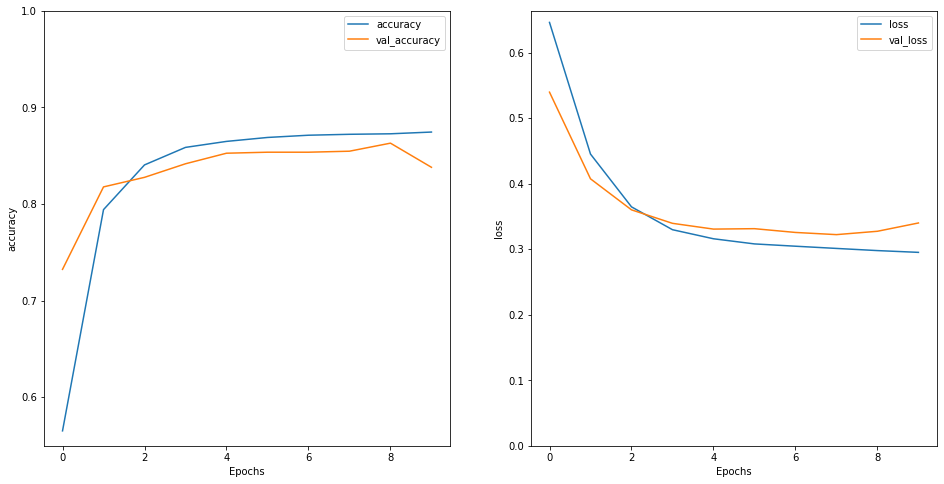

In [22]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [23]:
# Sample predictions
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions)

[[0.7950769]]
